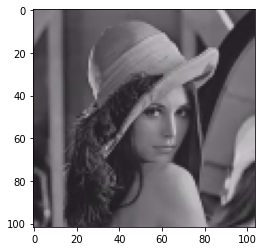

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np

img = plt.imread("/home/lee/Documents/영상처리/lena.png")
plt.imshow(img)

In [2]:
img[:,:,0:3]
img[:,:,1] = img[:,:,0]
img[:,:,2] = img[:,:,0]

img[:,:,0] +40

array([[40.482353, 40.505882, 40.505882, ..., 40.309803, 40.17647 ,
        40.14902 ],
       [40.47451 , 40.505882, 40.50196 , ..., 40.16863 , 40.14118 ,
        40.1451  ],
       [40.47451 , 40.50196 , 40.50196 , ..., 40.14118 , 40.14118 ,
        40.152943],
       ...,
       [40.376472, 40.360783, 40.270588, ..., 40.30196 , 40.376472,
        40.47059 ],
       [40.431374, 40.486275, 40.32941 , ..., 40.4     , 40.482353,
        40.572548],
       [40.41961 , 40.41961 , 40.333332, ..., 40.52941 , 40.631374,
        40.631374]], dtype=float32)

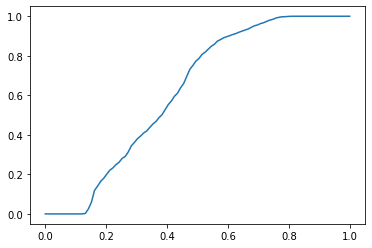

In [2]:
num_bin = 100
x_values = np.linspace(0,1, num_bin)
red=img[:,:,0]
img_pixels = [np.shape(np.where(red < x))[1] for x in x_values]
prob_cdf = np.array(img_pixels) / red.size
plt.plot(x_values, prob_cdf)

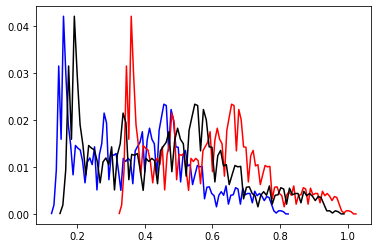

In [4]:
hist, x = np.histogram(red, bins = num_bin)
plt.plot(x[1:], hist / red.size, 'b-')

hist, x = np.histogram(red+0.2, bins = num_bin)
plt.plot(x[1:], hist / red.size, 'r-')

hist, x = np.histogram(red*1.2, bins = num_bin)
plt.plot(x[1:], hist / red.size, 'k-')

# 시험 히스토그램과 for문 안쓰고 cdf, pdf나타낼줄 알아야한다.

- 분포도가 불균형한것보다는 균형적인게 좀더 선명하게 보인다

# 히스토그램 평활화

# 레나이미지

(102, 104, 4)
(1000,) (1001,)
(1000,)
(102, 104, 3)
10608
10608
(102, 104)
(102, 104)
(102, 104, 3)


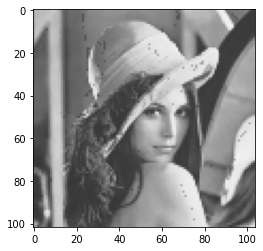

In [51]:
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np

color_array = plt.imread("/home/lee/Documents/영상처리/lena.png")
# plt.imshow(color_array)
print(color_array.shape)

rgb = color_array[:,:,0:3] # rgb 가져오기
red = rgb[:,:,0] # red 가져오기

num_bin = 1000 
x_values = np.linspace(0, 1, num_bin) # 0~1 사이의 값이 num_bin에 입력받은 개수만큼 생성됨.

hist, x = np.histogram(red, bins = num_bin) # hist : 해당되는 값이 몇개 가지고 있는지 나타내준다, x : 구간
print(hist.shape, x.shape)
# plt.plot(x[1:], hist) # red값에서 가지고 있는 0~1000사이의 분포

sum_hist = [np.sum(hist[:i]) for i in range(len(hist))] 
print(np.array(sum_hist).shape)

# plt.plot(sum_hist) # cdf
print(rgb.shape) 
print(102*104)

num_pixels = rgb.shape[0]*rgb.shape[1]
print(num_pixels) # 위에 102*104 해서 이미지의 픽셀개수

n = np.array(sum_hist) / num_pixels
# plt.plot(n) # 기존 cdf는 10608이였지만 확률로 바꿔서 1이됨
# plt.plot(x_values, n) # 좀더 정확하게 cdf를 그릴려면 다음과 같이

eq = np.copy(red)
for i in range(1, num_bin):
    idx = np.where((red > x_values[i-1]) & (red < x_values[i]))
    eq[idx] = n[i]
    
print(eq.shape)
eq_color = np.repeat(eq[:,:,np.newaxis], 3, axis=2)
print(eq.shape)
print(eq_color.shape)

hist_eq, x = np.histogram(eq, bins = num_bin)
# plt.plot(x[1:], hist, color='r') #  원본이미지
# plt.plot(x[1:], hist_eq, color='b') # 평활화된 이미지

# plt.imshow(rgb)
plt.imshow(eq_color)

# UFO이미지

(155, 244, 4)
(1000,) (1001,)
(1000,)
(155, 244, 3)
37820


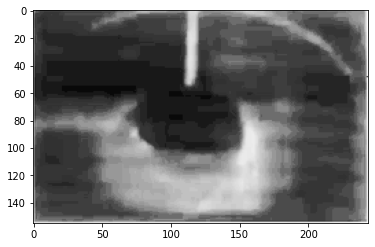

In [62]:
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np

color_array = plt.imread("/home/lee/Documents/영상처리/UFO.png")
# plt.imshow(color_array)
print(color_array.shape)

rgb = color_array[:,:,0:3] # rgb 가져오기
red = rgb[:,:,0] # red 가져오기

num_bin = 1000 
x_values = np.linspace(0, 1, num_bin) # 0~1 사이의 값이 num_bin에 입력받은 개수만큼 생성됨.

hist, x = np.histogram(red, bins = num_bin) # hist : 해당되는 값이 몇개 가지고 있는지 나타내준다, x : 구간
print(hist.shape, x.shape)
# plt.plot(x[1:], hist) # red값에서 가지고 있는 0~1000사이의 분포

sum_hist = [np.sum(hist[:i]) for i in range(len(hist))] 
print(np.array(sum_hist).shape)

# plt.plot(sum_hist) # cdf
print(rgb.shape) 
print(155*244)

r_eq = np.copy(red)
for i in range(1, num_bin):
    idx = np.where((red > x_values[i-1]) & (red < x_values[i]))
    r_eq[idx] = sum_hist[i] / red.size
    
hist_eq, x_eq = np.histogram(r_eq, bins = num_bin)
# plt.plot(x[1:], hist, color='r', label='original') #  원본이미지
# plt.plot(x_eq[1:], hist_eq, color='b', label='equalized') # 평활화된 이미지
# plt.legend(loc='upper right')

plt.imshow(np.repeat(r_eq[:,:,np.newaxis], 3, axis=2))
plt.show()

# 과제 - 칼라이미지 평활화

(274, 269, 3)
(274, 269, 3)


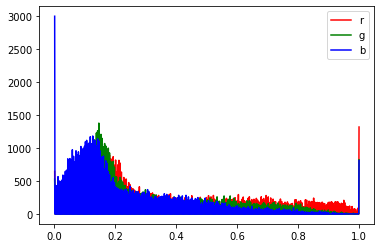

In [73]:
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np

color_array = plt.imread("/home/lee/Documents/영상처리/apple.png")
# plt.imshow(color_array)

print(color_array.shape)
rgb = color_array[:,:,0:3]
print(rgb.shape)

red = rgb[:,:,0]
green = rgb[:,:,1]
blue = rgb[:,:,2]


num_bin = 1000
x_values = np.linspace(0, 1, num_bin)
hist_red, x_red = np.histogram(red, bins = num_bin) 
hist_green, x_green = np.histogram(green, bins = num_bin) 
hist_blue, x_blue = np.histogram(blue, bins = num_bin) 

plt.plot(x_red[1:], hist_red, color='r', label='r')
plt.plot(x_green[1:], hist_green, color='g', label = 'g')
plt.plot(x_blue[1:], hist_blue, color='b', label = 'b')
plt.legend(loc = 'upper right')

(1000,)
(1000,)
(1000,)


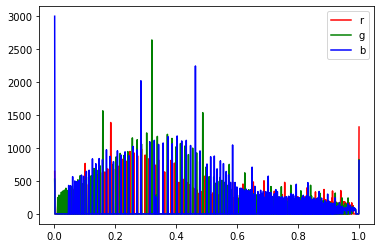

In [76]:
sum_hist_red = [np.sum(hist_red[:i]) for i in range(len(hist_red))]
sum_hist_green = [np.sum(hist_green[:i]) for i in range(len(hist_green))]
sum_hist_blue = [np.sum(hist_blue[:i]) for i in range(len(hist_blue))]
print(np.array(sum_hist_red).shape)
print(np.array(sum_hist_green).shape)
print(np.array(sum_hist_blue).shape)

r_eq = np.copy(red)
g_eq = np.copy(green)
b_eq = np.copy(blue)

for i in range(1, num_bin):
    idx = np.where((red > x_values[i-1]) & (red < x_values[i]))
    r_eq[idx] = sum_hist_red[i] / red.size    
for i in range(1, num_bin):
    idx = np.where((green > x_values[i-1]) & (green < x_values[i]))
    g_eq[idx] = sum_hist_green[i] / green.size
for i in range(1, num_bin):
    idx = np.where((blue > x_values[i-1]) & (blue < x_values[i]))
    b_eq[idx] = sum_hist_blue[i] / blue.size

hist_red_eq, x_red_eq = np.histogram(r_eq, bins = num_bin)
hist_green_eq, x_green_eq = np.histogram(g_eq, bins = num_bin)
hist_blue_eq, x_blue_eq = np.histogram(b_eq, bins = num_bin)

plt.plot(x_red_eq[1:], hist_red_eq, color='r', label='r')
plt.plot(x_green_eq[1:], hist_green_eq, color='g', label = 'g')
plt.plot(x_blue_eq[1:], hist_blue_eq, color='b', label = 'b')
plt.legend(loc = 'upper right')

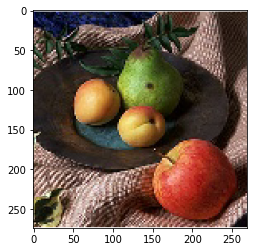

In [88]:
color_array = plt.imread("/home/lee/Documents/영상처리/apple.png")
plt.imshow(color_array)

(274, 269, 3)


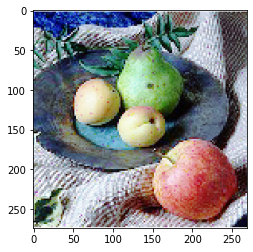

In [103]:
eq_img = rgb[:,:,0:3]
print(eq_img.shape)

eq_img[:,:,0] = r_eq
eq_img[:,:,1] = g_eq
eq_img[:,:,2] = b_eq

plt.imshow(eq_img)

In [4]:
import matplotlib.pyplot as plt
color_array = plt.imread("/home/lee/Documents/영상처리/apple.png")
# plt.imshow(color_array)

print(color_array.shape)
rgb = color_array[:,:,0:3]
rgb.size
rgb.shape[0] * rgb.shape[1] * 3

(274, 269, 3)


221118

(274, 269, 3)
(274, 269, 3)
(274, 269, 3)


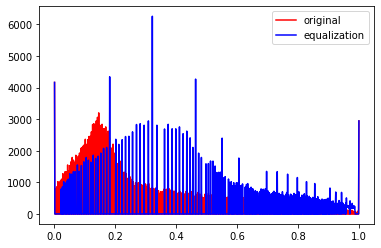

In [127]:
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np

color_array = plt.imread("/home/lee/Documents/영상처리/apple.png")
# plt.imshow(color_array)

print(color_array.shape)
rgb = color_array[:,:,0:3]
print(rgb.shape)

num_bin = 1000
x_values = np.linspace(0, 1, num_bin)
hist_rgb, x_rgb = np.histogram(rgb, bins = num_bin) 

plt.plot(x_rgb[1:], hist_rgb, color='r', label='original')
sum_hist_rgb = [np.sum(hist_rgb[:i]) for i in range(len(hist_rgb))]

rgb_eq = np.copy(rgb)
print(rgb_eq.shape)

for i in range(1, num_bin):
    idx = np.where((rgb > x_values[i-1]) & (rgb < x_values[i]))
    rgb_eq[idx] = sum_hist_rgb[i] / rgb.size 
    
hist_rgb_eq, x_rgb_eq = np.histogram(rgb_eq, bins = num_bin)
plt.plot(x_rgb_eq[1:], hist_rgb_eq, color='b', label='equalization')
plt.legend(loc='upper right')

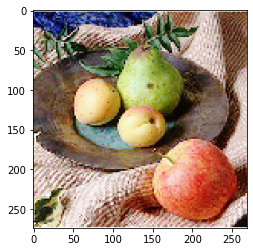

In [129]:
plt.imshow(rgb_eq)